In [1]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [55]:
hatches = ['', '\\', '/', 'x']
colors = [
"#d73027",
"#fee090",
"#91bfdb",
"#4575b4"]

In [122]:
def read_file(filename):
    with open(filename, "r") as fp:
        lines = fp.readlines()
    data_normlat = []
    data_decode = []
    data_mr_jct = []
    for i in range(0,len(lines),3):
        normlat = float(lines[i].split(":")[1].strip().split('ms')[0])
        decode = float(lines[i+1].split(":")[1].strip().split('ms')[0])
        mr_jct = float(lines[i+2].split(":")[1].strip().split('ms')[0])
        data_normlat.append(normlat)
        data_decode.append(decode)
        data_mr_jct.append(mr_jct/1000)
    return data_normlat, data_decode, data_mr_jct

In [123]:

# Calculate averages for each system and metric
def calculate_averages(values):
    return {system: np.mean(runs) for system, runs in values.items()}

# Function to add value labels on top of bars  
def add_value_labels(ax, bars):  
    for bar in bars:  
        height = bar.get_height()  
        ax.annotate('{:.1f}'.format(height),  
                    xy=(bar.get_x() + bar.get_width() / 2, height),  
                    xytext=(0, 3),  # 3 points vertical offset  
                    textcoords="offset points",  
                    ha='center', va='bottom', fontsize=15)  

In [124]:
parrot_norm_lat, parrot_decode, parrot_mr_jct = read_file('parrot.txt')
tput_norm_lat, tput_decode, tput_mr_jct = read_file('vllm_tput.txt')
lat_norm_lat, lat_decode, lat_mr_jct = read_file('vllm_lat.txt')

In [120]:
print(lat_norm_lat, lat_decode, lat_mr_jct)

[900.2278256638854, 830.8391235695717, 804.7549314863577, 781.002223566467, 821.4082604027487] [51.06494516167406, 38.998038331277456, 38.58842680106805, 39.10191076599156, 39.35843666214065] [81.11034, 88.783, 87.05716000000001, 87.11124000000001, 88.10153]


In [128]:


# Assuming you have the following data for three systems and three runs each
# Replace these lists with your actual data
normlat_values = {
    'Parrot': parrot_norm_lat,
    'Tput': tput_norm_lat,
    'LAT': lat_norm_lat
}

decode_time_values = {
    'Parrot': parrot_decode,
    'Tput': tput_decode,
    'LAT': lat_decode
}

mr_jct_values = {
    'Parrot': parrot_mr_jct,
    'Tput': tput_mr_jct,
    'LAT': lat_mr_jct
}

# # Assuming you have the following data for three systems and three runs each
# # Replace these lists with your actual data
# normlat_values = {
#     'Parrot': [179.1391507452295, 179.1391507452295, 179.1391507452295],
#     'Tput': [179.1391507452295, 179.1391507452295, 179.1391507452295],
#     'LAT': [179.1391507452295, 179.1391507452295, 179.1391507452295]
# }

# decode_time_values = {
#     'Parrot': [88.66374056524481, 88.66374056524481, 88.66374056524481],
#     'Tput': [88.66374056524481, 88.66374056524481, 88.66374056524481],
#     'LAT': [88.66374056524481, 88.66374056524481, 88.66374056524481]
# }

# mr_jct_values = {
#     'Parrot': [22479.57, 22479.57, 22479.57],
#     'Tput': [22479.57, 22479.57, 22479.57],
#     'LAT': [22479.57, 22479.57, 22479.57]
# }


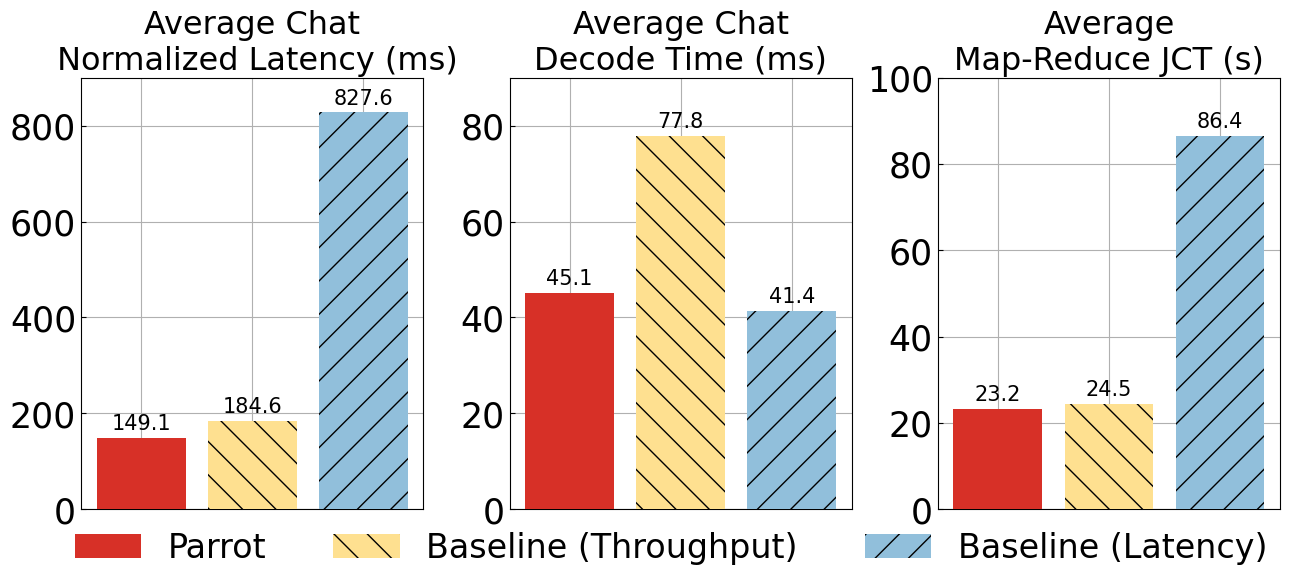

In [142]:
import matplotlib.pyplot as plt
import numpy as np

# Data and functions are the same as in the previous example
# ...

avg_normlat = calculate_averages(normlat_values)
avg_decode_time = calculate_averages(decode_time_values)
avg_mr_jct = calculate_averages(mr_jct_values)

systems = list(avg_normlat.keys())
x = [1,1.5,2]  # the label locations
systems_display = ['Parrot', 'Baseline (Throughput)', 'Baseline (Latency)']
# Plotting
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

# Plot bars for each metric and add value labels
for i, metric in enumerate([avg_normlat, avg_decode_time, avg_mr_jct]):
    for j, system in enumerate(systems):
        bar = axes[i].bar(x[j], metric[system], width=0.4, color=colors[j], hatch = hatches[j], label=system, zorder=3)
        add_value_labels(axes[i], bar)

    axes[i].set_xticks(x)
    axes[i].set_xticklabels(['','',''])
    axes[i].set_title(['Average Chat\n Normalized Latency (ms)', 'Average Chat\nDecode Time (ms)', 'Average\nMap-Reduce JCT (s)'][i], fontsize=23)

for i in range(3):
    axes[i].tick_params(axis='y', labelsize=25, direction='in')
    axes[i].tick_params(axis='x', labelsize=25, direction='in')
    axes[i].grid(True)
axes[0].set_ylim([0,900])
axes[1].set_ylim([0,90])
axes[2].set_ylim([0,100])

# Create custom handles for the legend
from matplotlib.patches import Patch
legend_handles = [Patch(facecolor=colors[i], hatch=hatches[i], label='fff') for i in range(len(systems))]

# Add the legend to the figure
fig.legend(legend_handles, systems_display, loc='lower center', ncol=3, frameon=False, prop = { "size": 24 }, bbox_to_anchor= (0.52, -0.1))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 1, 1.1])

# Show plot
plt.savefig("chat_mr.pdf", bbox_inches="tight")


In [86]:
print(labels)

['Normalized Latency', 'Decode Time', 'MR JCT']
